In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [22]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('./Diabetes dataset/Clean_diabetes_dataset.csv')
df

# df_male = df.loc[df['gender'] == 'Male']    # GET ONLY THE MALE DATA(REASON: APATOTO FEMALE DATA THAK)

# df = df.drop("gender",axis="columns")     # REMOVE GENDER COLUMN

# df['gender'].replace('Male', 1, inplace=True)
# df['gender'].replace('Female', 0, inplace=True)
# df = df.loc[df['gender'] != 'Other']

# df = df.drop("smoking_history",axis="columns")     # REMOVE SMOKING HISTORY COLUMN(REASON: DONT KNOW HOW SMOKING AFFECTS DIABETES)
# df_male

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
634,763,10,101,76,48,180,32.9,0.171,63,0
635,764,2,122,70,27,0,36.8,0.340,27,0
636,765,5,121,72,23,112,26.2,0.245,30,0
637,766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
# col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
# for i in col:
#   df[i].replace(0,df[i].mean(),inplace=True)



In [24]:
# SPLIT DF_MALE INTO X & Y
# X = INDEPENDENT VARIABLES
# Y = EPENDENT VARIABLES
y = df['Outcome'].copy()
X = df.drop(['Outcome','DiabetesPedigreeFunction'], axis="columns")

y.value_counts()

Outcome
0    439
1    200
Name: count, dtype: int64

In [25]:
# HANDLE ADTA IMBALANCE - INCREASE/DECREASE ROWS WITH CLASS VALUES(0/1) IF ONE IS LOWER IN NUMBER
# FOR BETTER TRAINING

# from imblearn.over_sampling import SMOTE

# X_balanced, y_balanced = SMOTE().fit_resample(X, y)
# y_balanced.value_counts()

In [26]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [27]:
y_train
len(X_test)

128

In [28]:
from keras.models import Sequential
from keras.layers import Dense

# model = keras.models.Sequential()
# model.add(keras.layers.Dense(32, input_shape=(8,), activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(16, activation='relu'))
# model.add(keras.layers.Dense(8, activation='relu'))
# model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model = Sequential()
model.add(Dense(32,input_dim=8, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary(
    expand_nested=True,
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                288       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2929 (11.44 KB)
Trainable params: 2929 (11.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# earlystop_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# history = model.fit(
#     X_train,
#     y_train,
#     validation_split=0.2,
#     epochs=50,
#     batch_size=10,
#     # callbacks=[earlystop_loss],
# )

history = model.fit(X_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
52/52 [==============================] - 2s 5ms/step - loss: 0.6198 - accuracy: 0.6908
Epoch 2/150
52/52 [==============================] - 0s 7ms/step - loss: 0.5050 - accuracy: 0.7495
Epoch 3/150
52/52 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.7769
Epoch 4/150
52/52 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7750
Epoch 5/150
52/52 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7769
Epoch 6/150
52/52 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7867
Epoch 7/150
52/52 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.7886
Epoch 8/150
52/52 [==============================] - 0s 8ms/step - loss: 0.4229 - accuracy: 0.7984
Epoch 9/150
52/52 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.7847
Epoch 10/150
52/52 [==============================] - 0s 4ms/step - loss: 0.4095 - accuracy: 0.7906
Epoch 11/

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print(loss)

4/4 [==============================] - 0s 4ms/step - loss: 1.6752 - accuracy: 0.7422
Accuracy: 74.22
1.6752121448516846


In [31]:
# from matplotlib import pyplot as plt

# print("Epochs run:", len(history.history["loss"]))

# print(history.history.keys())
# acc = history.history["accuracy"]
# loss = history.history["loss"]

# val_acc = history.history["val_accuracy"]
# val_loss = history.history["val_loss"]
# epochs = range(1, len(acc) + 1)

# # Train and validation accuracy
# plt.figure(figsize=(20, 8))
# plt.subplot(1, 2, 1)
# plt.ylim((0, 1))
# plt.plot(epochs, acc, label="Training accurarcy")
# plt.plot(epochs, val_acc, label="Validation accurarcy")
# plt.title("Training and Validation accurarcy")
# plt.legend()

# # Train and validation loss
# plt.subplot(1, 2, 2)

# plt.plot(epochs, loss, label="Training loss")
# plt.plot(epochs, val_loss, label="Validation loss")
# plt.title("Training and Validation loss")
# plt.legend()
# plt.show()

In [32]:
# HYPER PARAMETER TUNING

# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train, y_train)

# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [33]:
# PREDICT RESULTS

# make probability predictions with the model
y_pred = model.predict(X_test)
# round predictions 
y_pred_rounded = [round(x[0]) for x in y_pred]

4/4 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

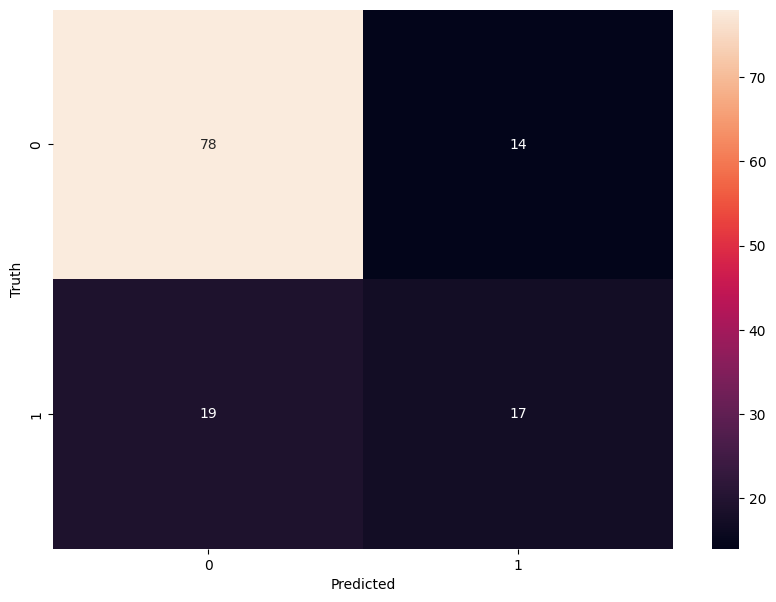

In [34]:
# CONFUSION MATRIX

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_pred_rounded)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [35]:

print(classification_report(y_test, y_pred_rounded))


              precision    recall  f1-score   support

           0       0.80      0.85      0.83        92
           1       0.55      0.47      0.51        36

    accuracy                           0.74       128
   macro avg       0.68      0.66      0.67       128
weighted avg       0.73      0.74      0.74       128



In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_rounded)
mse = mean_squared_error(y_test, y_pred_rounded)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.2578125
mse =>  0.2578125
rmse =>  0.5077524002897476


In [37]:
# SAVING THE MODEL USING PICKLE PACKAGE

# import pickle

# # save the iris classification model as a pickle file
# model_pkl_file = "diabetes-model-ann.pkl"  

# with open(model_pkl_file, 'wb') as file:  
#     pickle.dump(model, file)

In [38]:
# # LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
# with open(model_pkl_file, 'rb') as file:  
#     model = pickle.load(file)

# # evaluate model 
# y_predict = model.predict(X_test)

# # check results
# pred = model.evaluate(X_test, y_test)
# print(f"Accuracy : {pred * 100}%")